# Excersise 2: Filtering and Convolution
Image filtering allows you to apply various effects on images. In this assignment you will focus on filtering in the spatial domain, also known as convolution. Convolution provides a way of multiplying together two arrays of numbers, to produce a third array of numbers. In the image processing context, one of the input arrays is normally a grey-level image. The second array is usually much smaller, and is also two-dimensional (matrix), and is known as the convolution kernel. Depending on the designed filter and intended effect, the kernel can be a square matrix, e.g., of 3x3, 5x5 or 7x7 dimensions.
Write a filtering function that takes an input image, performs convolution using a given kernel, and returns the resulting image.

before we get started, we have to import some modules and load image to input.

In [1]:
#import modules and images
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

#generate random image from lorenpicsom
#image credit: https://picsum.photos/
url = 'https://picsum.photos/300/200'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

#or you can use image of mine.
img = Image.open('assets/test_image_scuba.jpg').resize((300,200), Image.ANTIALIAS)

img=np.asarray(img.convert("L"))

plt.imshow(img, cmap='gist_gray')
img.shape

(200, 300)

## Prob a)
> Design a convolution kernel that enables the computation of average intensity value in a 3x3 region for each pixel. Use this kernel and the filtering function above, save the resulting image.

### Answer a)
The 3x3 convoluton kernel to compute average intensity value is defined as below.
$$
k = 
\frac{1}{9}
\begin{pmatrix}
1 &1 &1 \\
1 &1 &1 \\
1 &1 &1 \\
\end{pmatrix}
$$

In [2]:
# average kernel
k_size = 3
k_avg = np.ones((k_size,k_size),dtype=np.float) / k_size**2

And define function to conduct convolution operation

In [3]:
def conv2d(image, kernel):
    # This function which takes an image and a kernel 
    # Add zero padding to the input image
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros(image.shape)
    
    pad_size = np.int((kernel.shape[0]-1) / 2)
    image_padded = np.zeros((image.shape[0] + pad_size*2, image.shape[1] + pad_size*2))   
    image_padded[pad_size:-1*pad_size, pad_size:-1*pad_size] = image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y,x]=(kernel*image_padded[y:y+kernel.shape[0],x:x+kernel.shape[1]]).sum()
    return output
#     return image_padded

In [4]:
# plot function
def plot(imgs, titles=[]):
    fig, axs = plt.subplots(1, len(imgs), figsize=(20, 20))
    i=0
    for ax, theta in zip(axs, imgs):
        ax.imshow(np.clip(theta,0,255), cmap='gist_gray')       
        if titles: ax.title.set_text(titles[i])
        i=i+1              
    plt.show()

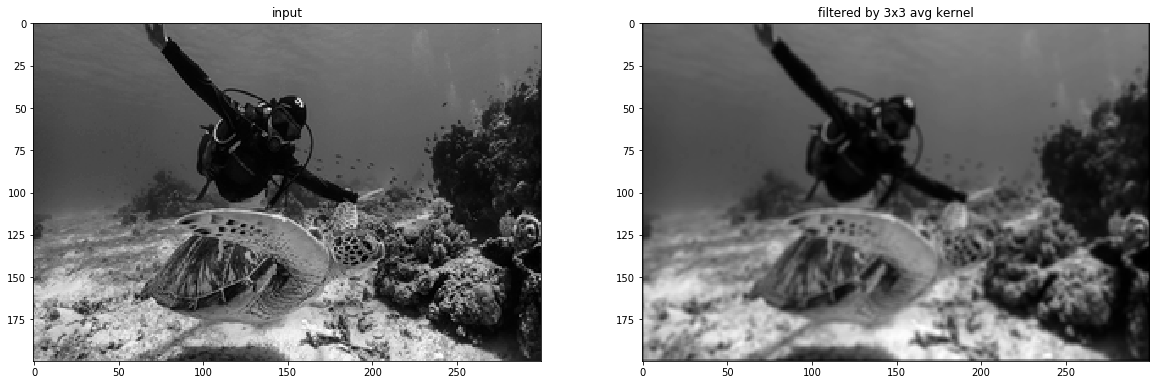

In [5]:
imgs=[img, conv2d(img, k_avg).clip(min=0, max=255) ]
titles = ["input", "filtered by 3x3 avg kernel"]
plot(imgs,titles)

## Prob b) 
> Use the kernels provided below, apply the filtering function and save the resulting images. 
Comment on the effect each kernel has on the input image.
$$
kernel A = 
\begin{pmatrix}
1 &2 &1 \\
2 &4 &2 \\
1 &2 &1 \\
\end{pmatrix}
,
kernel B = 
\begin{pmatrix}
0 &1 &0 \\
1 &-4&1 \\
0 &1 &0 \\
\end{pmatrix}
$$

## Answer b)
kernel A is   

kernel B is laplacian operator.
The laplacian is the second derivative of the image.   
It is extremely sensitive to noise, so it isn't used as much as other operators.   
Unless, of course you have specific requirements.  

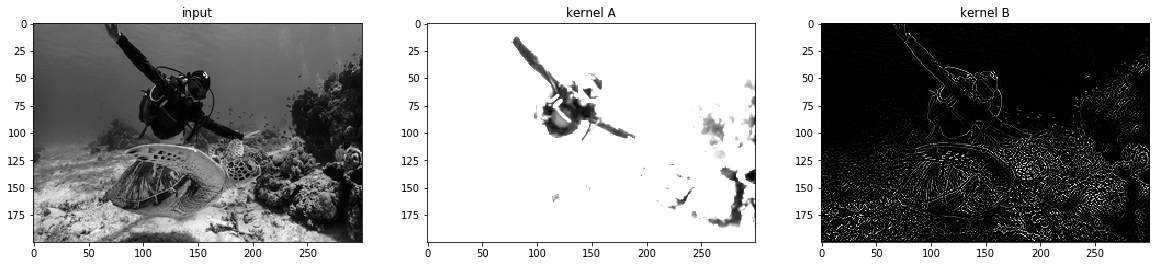

In [6]:
#define kernel
k_A = np.array([[1,2,1],[2,4,2],[1,2,1]])
k_B = np.array([[0,1,0],[1,-4,1],[0,1,0]])

#plot and image show
img_A = conv2d(img, k_A)
img_B = conv2d(img, k_B)
imgs=[img, img_A, img_B]
titles = ["input", "kernel A", "kernel B"]
plot(imgs, titles)

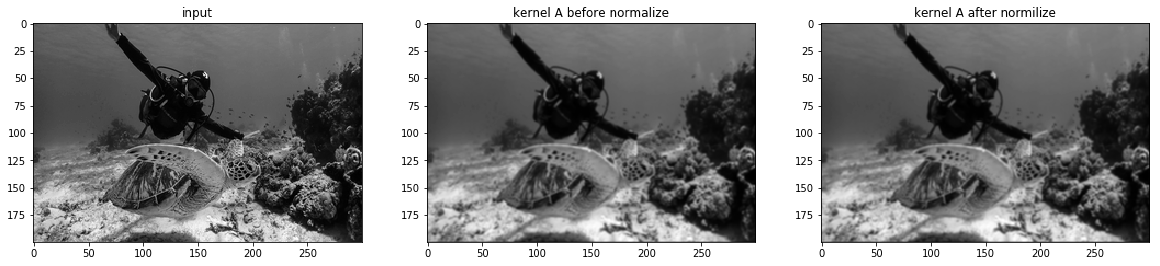

In [22]:
#define kernel
k_A = np.array([[1,2,1],[2,4,2],[1,2,1]])
k_B = np.array([[0,1,0],[1,-4,1],[0,1,0]])
k_A = k_A/np.sum(k_A)

#plot and image show
img_A = conv2d(img, k_A)
img_A_norm = conv2d(img, k_A_norm)
img_B = conv2d(img, k_B)
imgs=[img, img_A, img_A_norm]
titles = ["input", "kernel A before normalize", "kernel A after normilize"]
plot(imgs, titles)

## Prob c) 
> Use the filtering function for the following filtering operations:  
(i) A followed by A;     
(ii) A followed by B;   
(iii) B followed by A.   
Comment the results.

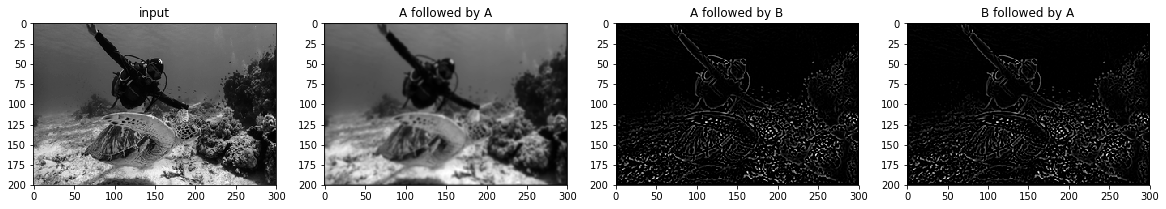

In [24]:
img_AA = conv2d(img_A, k_A)
img_AB = conv2d(img_A, k_B)
img_BA = conv2d(img_B, k_A)

imgs=[img, img_AA, img_AB, img_BA]
titles = ["input", "A followed by A", "A followed by B", "B followed by A"]
plot(imgs, titles)

## Prob d) 
> Keeping the effect of the kernels in b) the same, discuss how to extend them to larger filter kernels 5x5 and 7x7.   
Using the extended kernels repeat the operations in c).   
Comment on the results and compare them with the ones obtained in c).  

## Answer d)

<img src="https://www.researchgate.net/profile/Oleg_Shipitko/publication/325768087/figure/fig2/AS:637519863508992@1529007988866/Discrete-approximation-of-the-Gaussian-kernels-3x3-5x5-7x7.png" width="600">

The first kernel, $ kernel\ A$ is non-normalized gaussian kernal.

<img src="https://hcimage.com/help/Content/Resources/Images/Quantitation/Enhnce%20Example/LofG%20Matrix.png" width="600">

Second kernel $kernel\ B$ is laplacian kernel.   
The 3x3 laplacian filter can be extend into 5x5 or 7x7 size by combination with gaussian function. This is called "Laplacian of Gaussian (LoG)" filter. The LoG or Laplacian of Gaussian filter is a two step process in which the image is first smoothed by a Gaussian kernel and then the edges are detected using the Laplacian operator. The response of the smoothing is dependant upon the size of the object and the size of the Gaussian kernel used. Because of this relationship, a 5X5, 7X7 or 9X9 kernel may be selected.

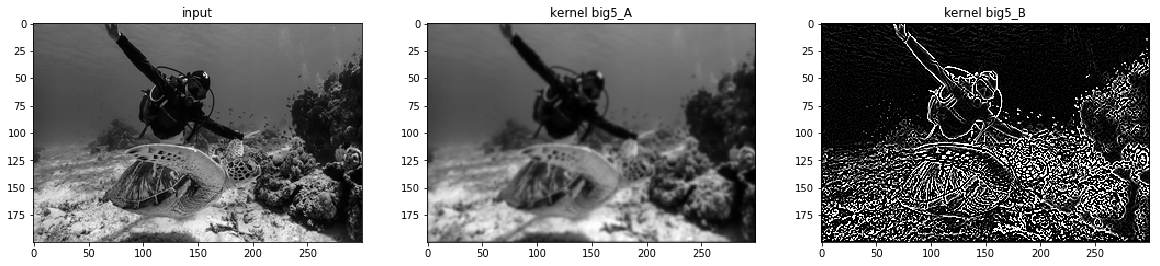

In [30]:
k_A5 = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])
k_B5 = np.array([[0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]])
k_A5 = k_A5/np.sum(k_A5)
#plot and image show
img_A5 = conv2d(img, k_A5)
img_B5 = conv2d(img, k_B5)
imgs=[img, img_A5, img_B5]
titles = ["input", "kernel big5_A", "kernel big5_B"]
plot(imgs, titles)

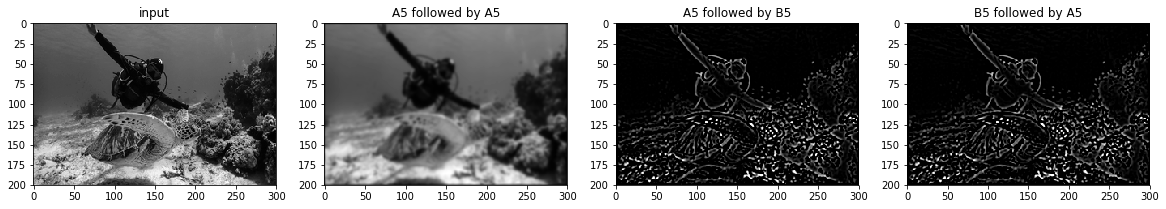

In [31]:
img_A5A5 = conv2d(img_A5, k_A5)
img_A5B5 = conv2d(img_A5, k_B5)
img_B5A5 = conv2d(img_B5, k_A5)

imgs=[img, img_A5A5, img_A5B5, img_B5A5]
titles = ["input", "A5 followed by A5", "A5 followed by B5", "B5 followed by A5"]
plot(imgs, titles)

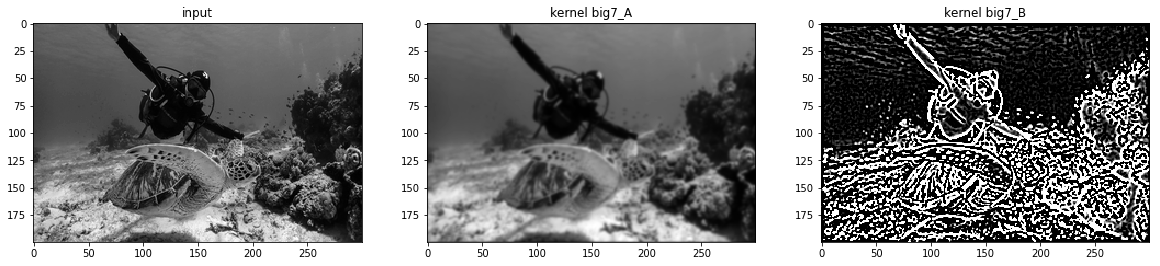

In [32]:
k_A7 = np.array([[0,0,1,2,1,0,0],[0,3,13,22,13,3,0],[1,13,49,97,59,13,1],[2,22,97,159,97,22,2],[1,13,59,97,59,13,1],[0,3,13,22,13,3,0],[0,0,1,2,1,0,0]])
k_B7 = np.array([[0,0,1,1,1,0,0],[0,1,3,3,3,1,0],[1,3,0,-7,0,3,1],[1,3,-7,-24,-7,3,1],[1,3,0,-7,0,3,1],[0,1,3,3,3,1,0],[0,0,1,1,1,0,0]])
k_A7 = k_A7/np.sum(k_A7)
#plot and image show
img_7A = conv2d(img, k_A7)
img_7B = conv2d(img, k_B7)
imgs=[img, img_7A, img_7B]
titles = ["input", "kernel big7_A", "kernel big7_B"]
plot(imgs, titles)

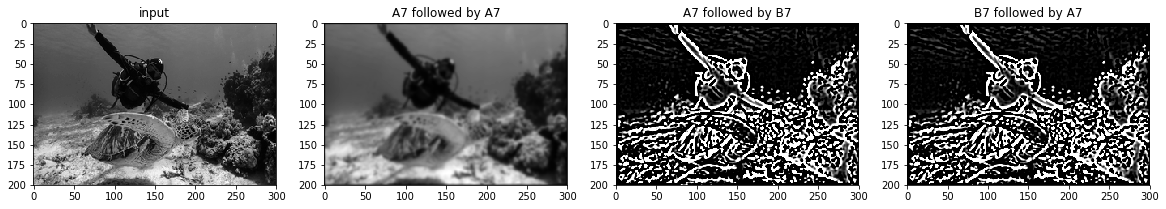

In [34]:
img_A7A7 = conv2d(img_7A, k_A7)
img_A7B7 = conv2d(img_7A, k_B7)
img_B7A7 = conv2d(img_7B, k_A7)

imgs=[img, img_A7A7, img_A7B7, img_B7A7]
titles = ["input", "A7 followed by A7", "A7 followed by B7", "B7 followed by A7"]
plot(imgs, titles)

In [12]:
def calculate(x,y,sigma):
    return ((x**2+y**2-2*sigma**2)/sigma**4)*np.exp(-1*(x**2+y**2)/2*sigma**2)

def laplacian_filter(size, sigma):
    mat = np.zeros((size,size))#([0] * size for i in range(size)]
    for x in range(size):
        for y in range (size):
            mat[x,y] = calculate(x-(size-1/2)/2,y-(size-1)/2,sigma)
            
#             calculate(i-(size-1)/2, j-(size-1)/2, sigma)
    return mat

In [13]:
laplacian_filter(3,1.4).shape
laplacian_filter(3,1.4)

array([[-0.02868175, -0.13271687, -0.02868175],
       [-0.26258201, -0.94448106, -0.26258201],
       [-0.13271687, -0.50361545, -0.13271687]])

In [18]:
def kern_laplacian(l=7, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """
    pi = np.pi
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = (-1)/(pi*sig**4)*(1-(xx**2+yy**2)/(2*sig**2))*np.exp(-(xx**2+yy**2)/(2*sig**2))

    return (kernel / np.sum(kernel)).astype(np.int)

In [19]:
def kern_gaussian(l=7, sig=1):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return np.round((kernel / np.sum(kernel)),2)*l**2

In [20]:
def kern_plot(kernel):
    fig, ax = plt.subplots()
    im = ax.imshow(kernel, interpolation='none')
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[0]):
            text = ax.text(j, i, kernel[j,i], ha="center", va="center", color="w")
    fig.tight_layout()
    plt.show()

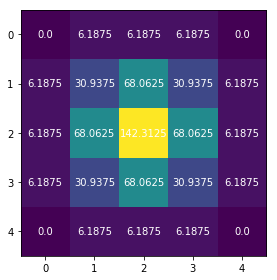

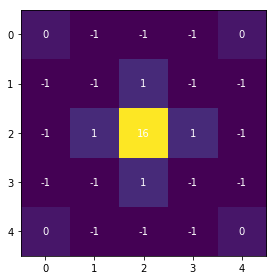

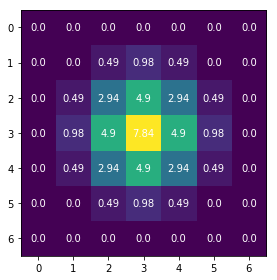

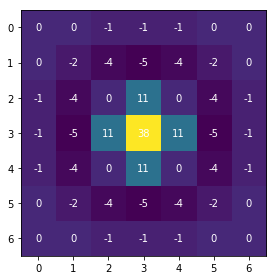

In [21]:
kA5=kern_gaussian(5,0.84089642)
kB5=kern_laplacian(5,0.816)


kern_plot(kA5*np.sum(kA5))
kern_plot(kB5)
kern_plot(kern_gaussian(7,1))
kern_plot(kern_laplacian(7,1))